<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
C:\Users\giuli\AppData\Local\Temp\ipykernel_18420\963897661.py:7: SyntaxWarning: invalid escape sequence '\p'
  data_path = 'data\pickle_files\cleaned_sp500_daily.pkl'


Basic Statistics:


,Mean,Median,Std,Variance,Skewness,Kurtosis
Ticker,,,,,,
TSLA,108.699947,23.951000,109.709273,12036.124492,0.665784,-1.058157
MLM,270.920068,216.799377,123.338560,15212.400428,0.918420,0.038324
POOL,227.908756,187.756912,135.496312,18359.250532,0.350577,-1.211374
PAYX,74.783524,68.570610,30.613403,937.180427,0.323597,-1.367730
JCI,42.789118,35.970102,14.708961,216.353547,0.666999,-1.002694
...,...,...,...,...,...,...
NUE,77.871770,51.838278,47.456726,2252.140809,0.926443,-0.670130
JBHT,124.258561,112.304367,42.887550,1839.341951,0.344243,-1.336437
AMAT,75.544401,51.875843,55.736446,3106.551363,0.942985,-0.029639


Outliers detected.


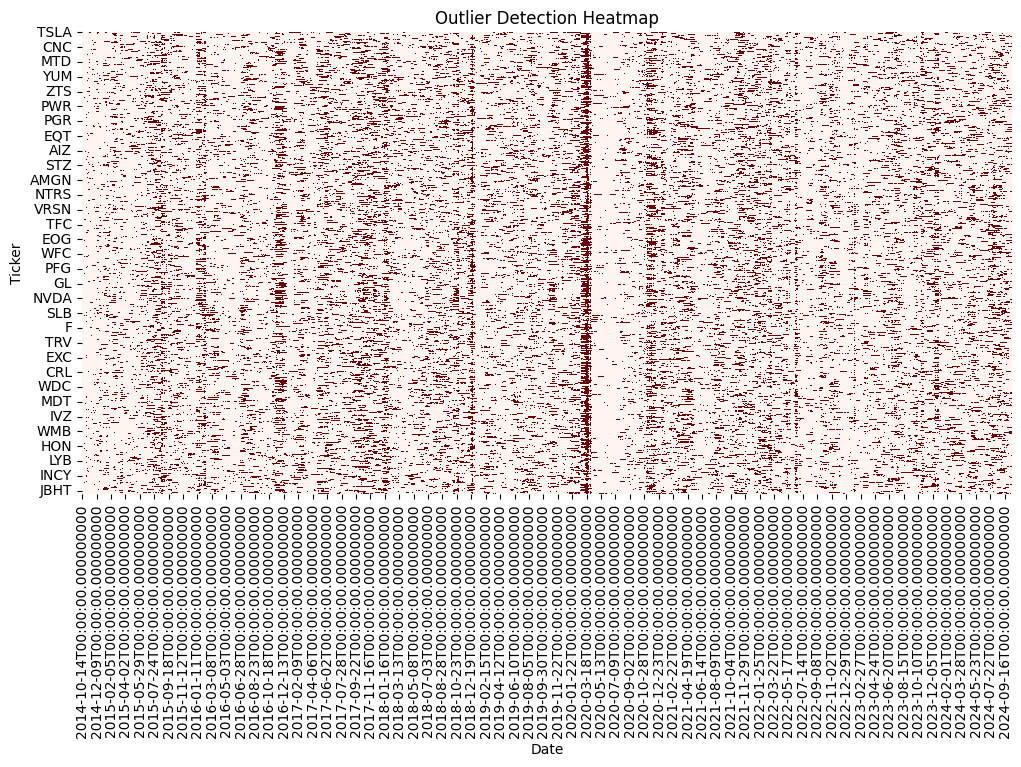

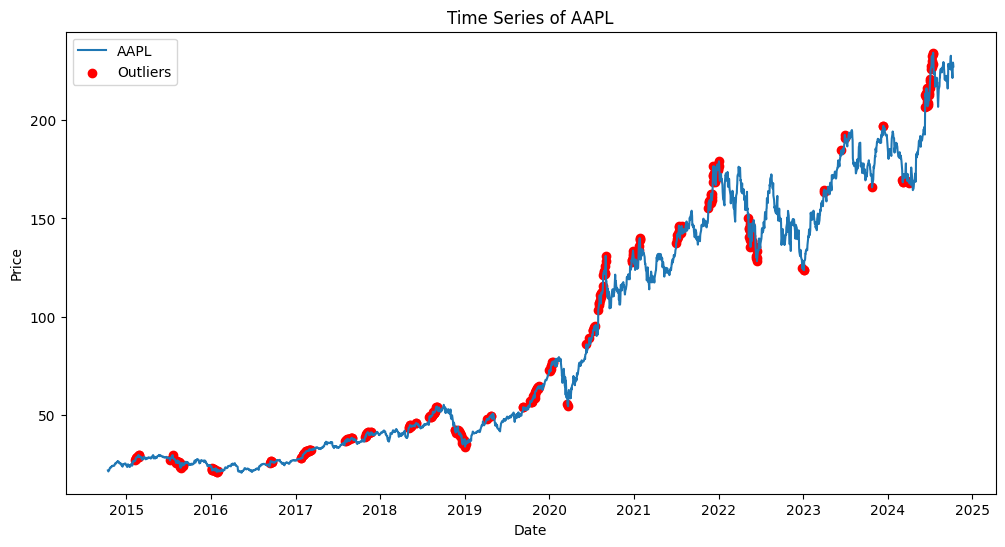

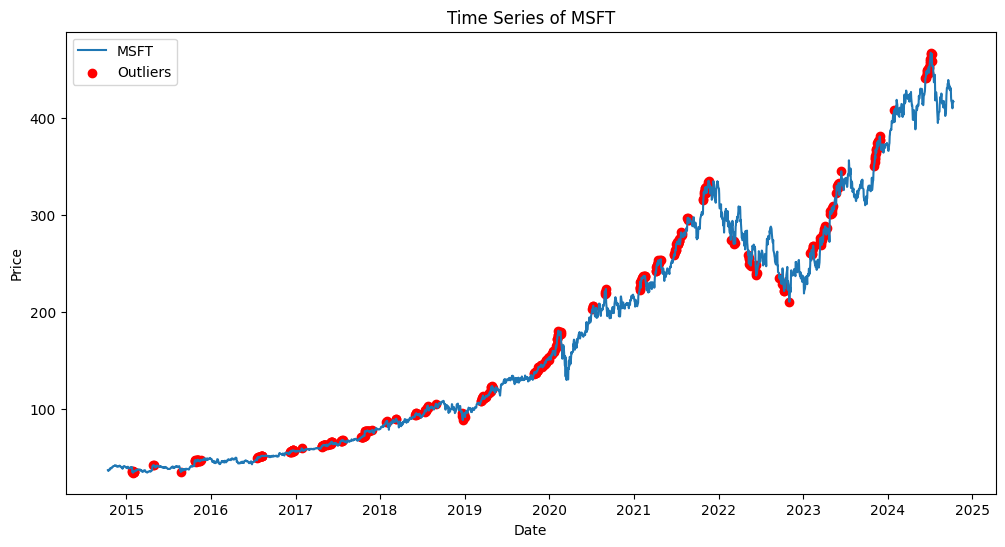

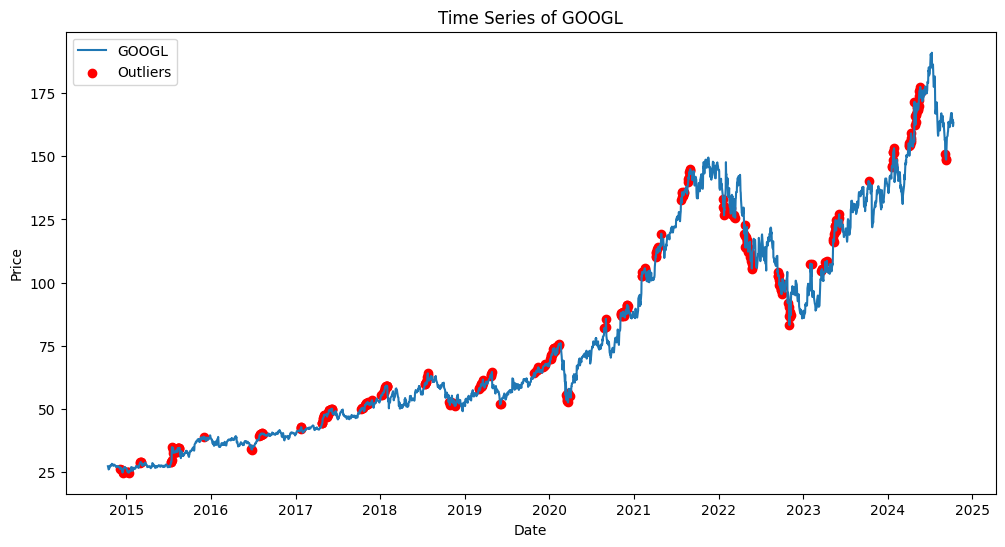

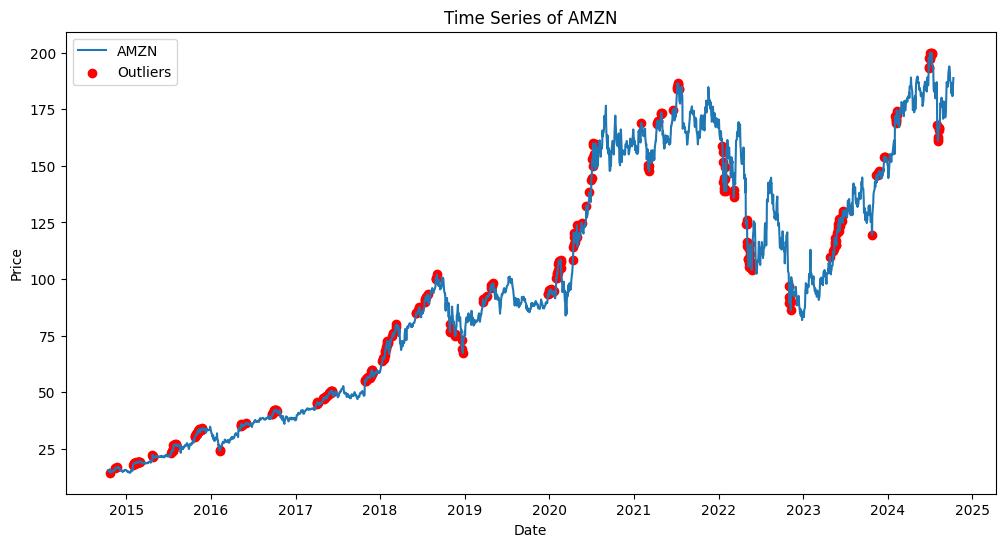

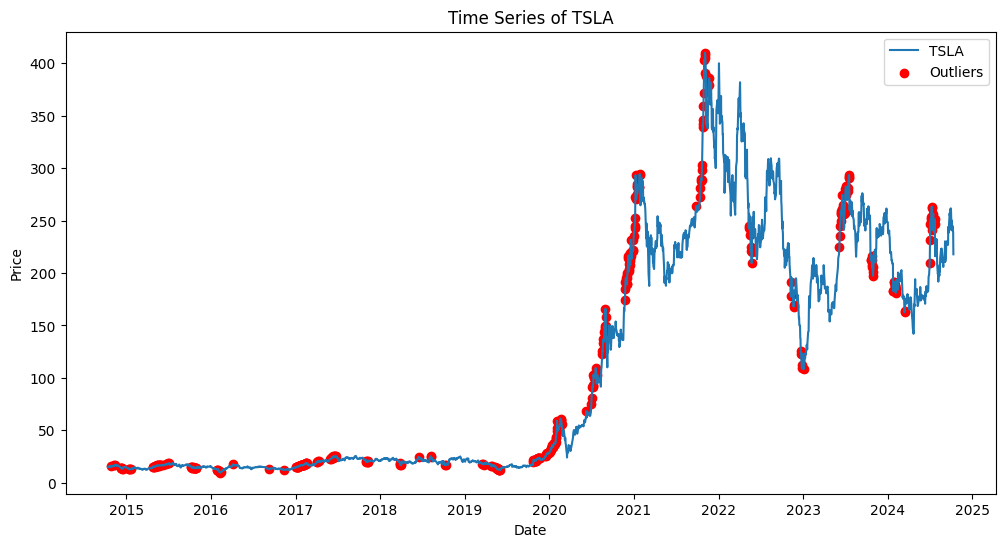

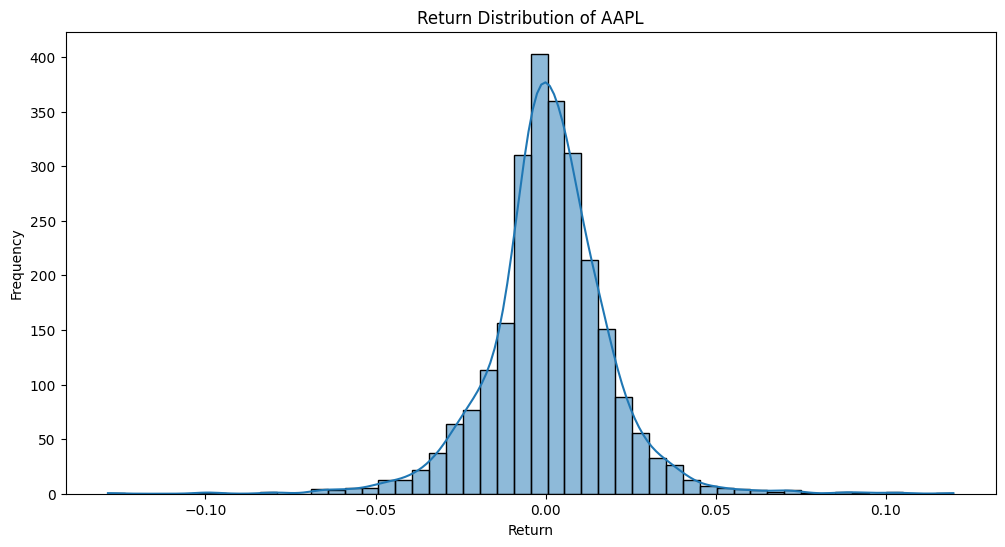

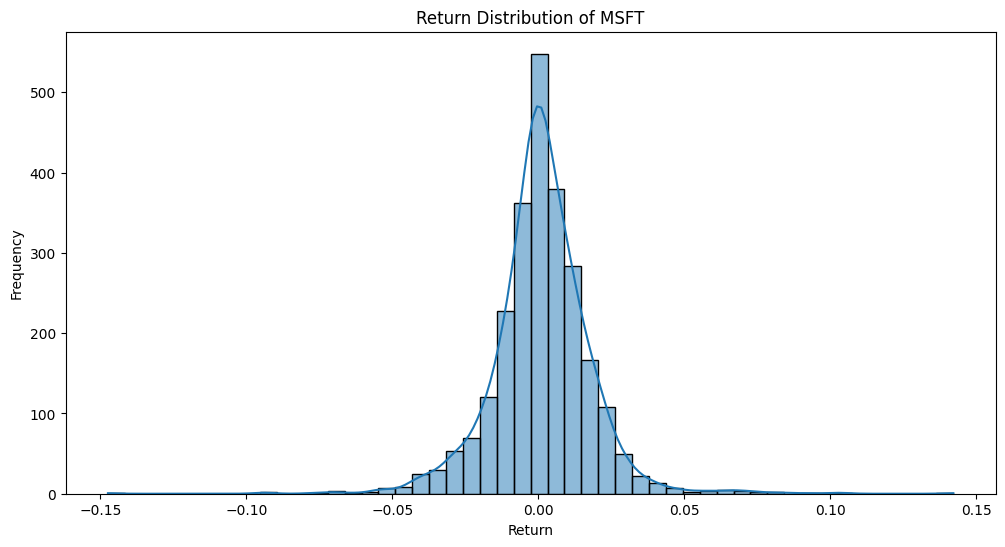

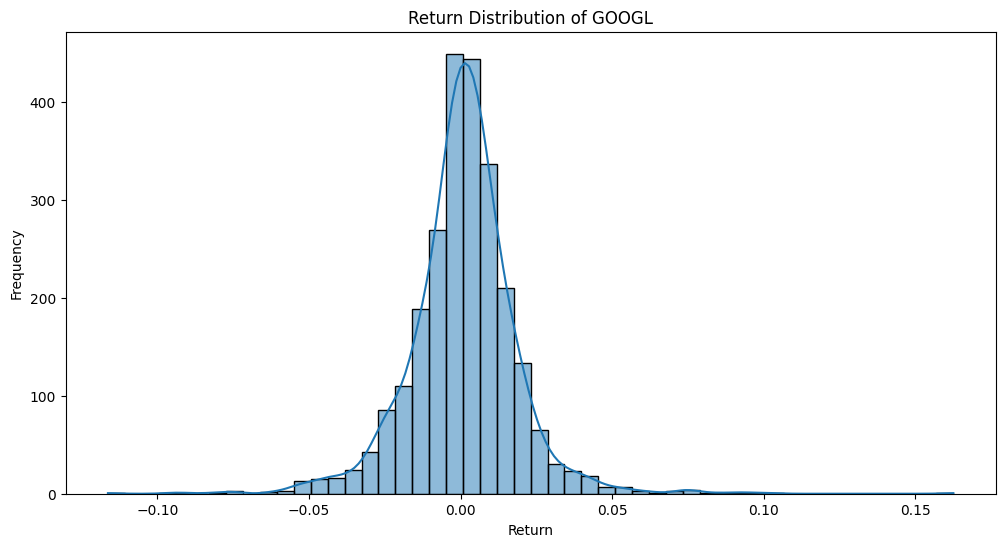

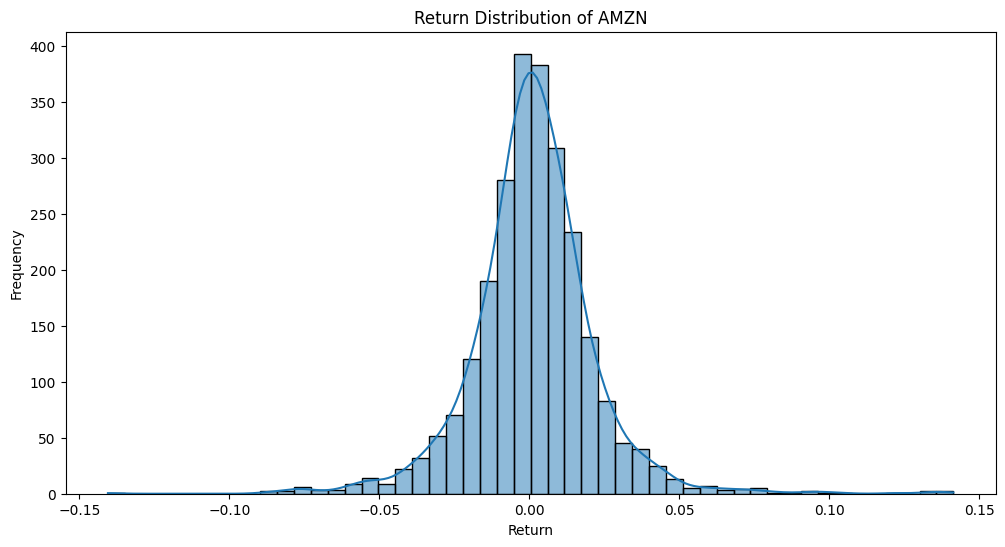

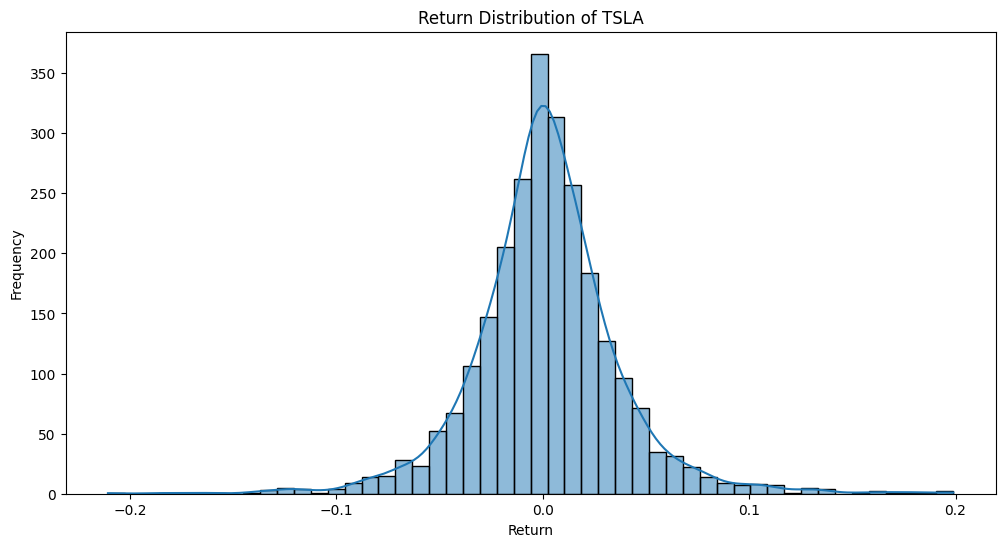

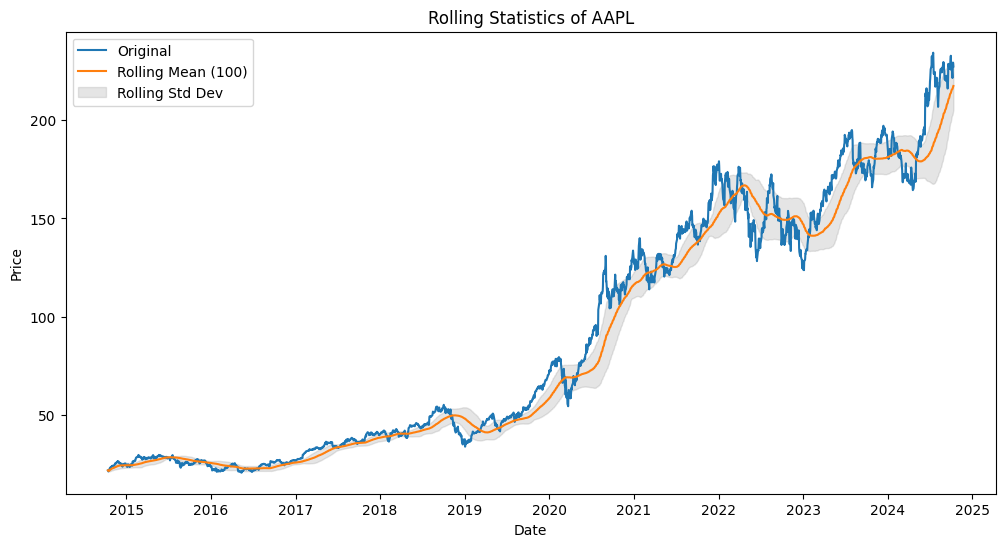

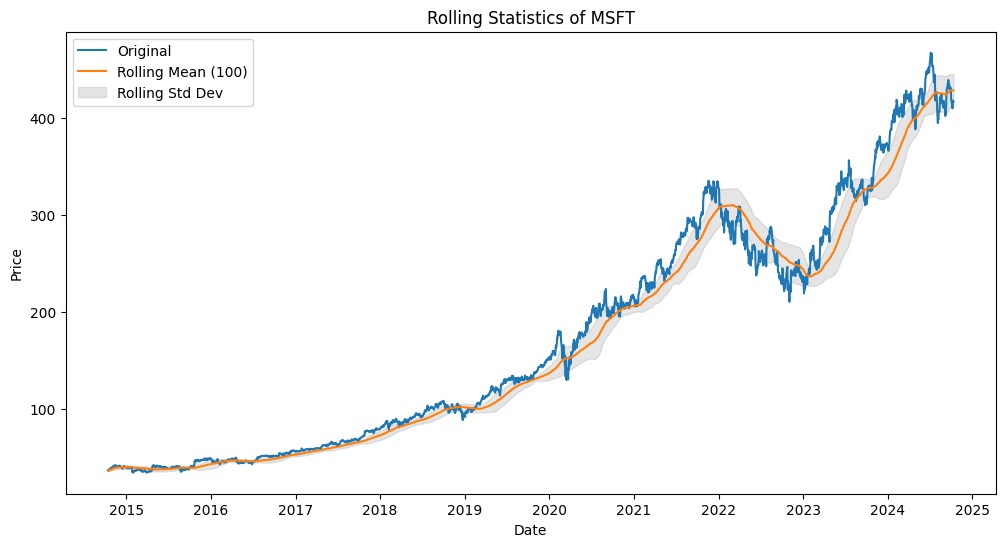

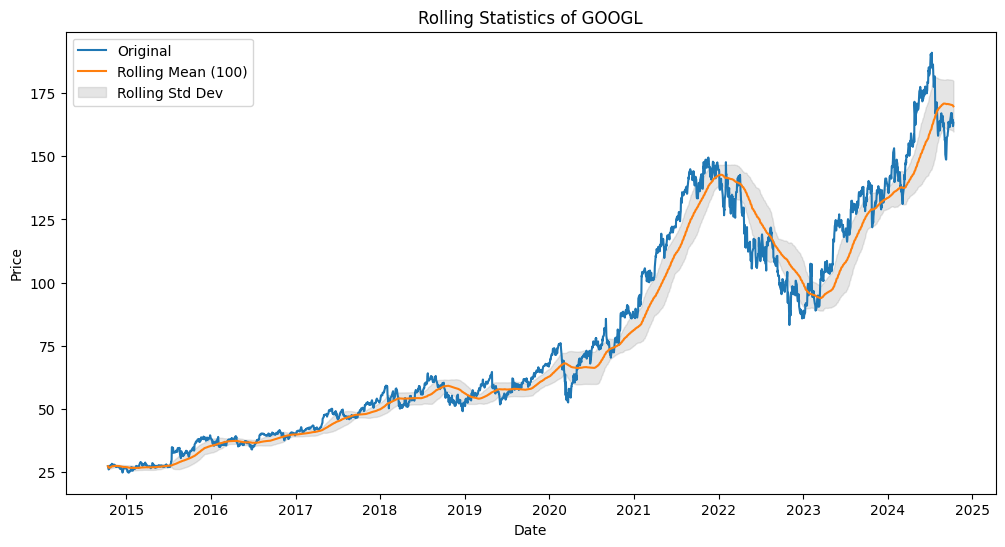

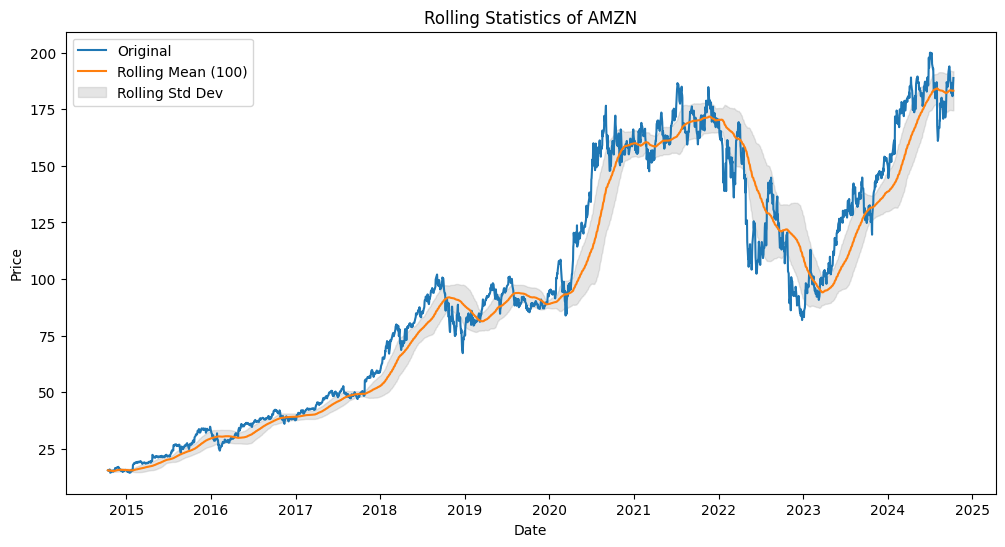

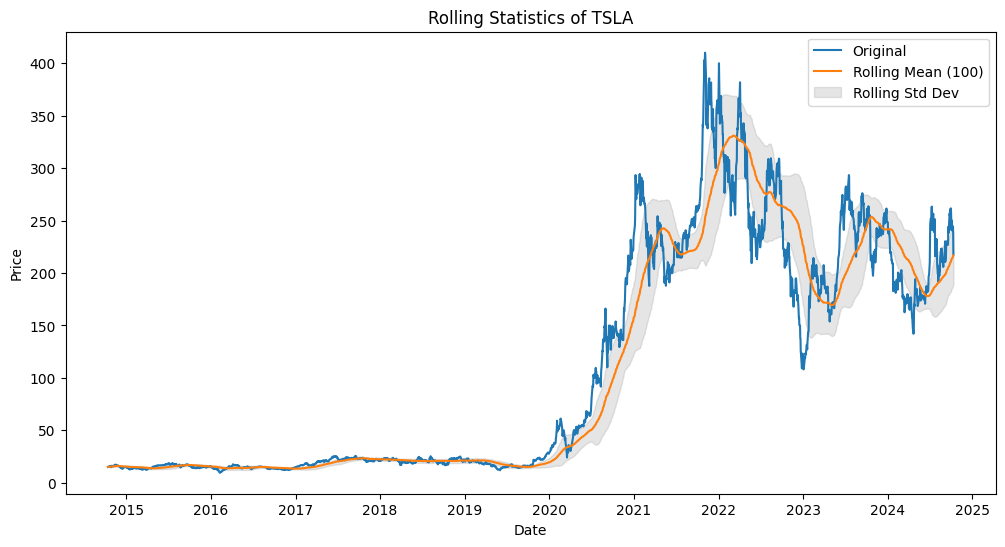

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-10-14 00:00:00+00:00 to 2024-10-11 00:00:00+00:00
Columns: 469 entries, TSLA to PYPL
dtypes: float64(469)
memory usage: 9.1 MB


In [15]:
# Import necessary modules
import pandas as pd
from helpermodules.statistical_analysis import StatisticalAnalysis
from helpermodules.memory_handling import PickleHelper

# Load the cleaned S&P 500 daily stock data
data_path = 'data\pickle_files\cleaned_sp500_daily.pkl'
# Load the DataFrame directly from the pickle file
df = pd.read_pickle(data_path)
# Initialize StatisticalAnalysis with the DataFrame
analysis = StatisticalAnalysis(df)

# Compute basic statistics
stats = analysis.compute_statistics()
print("Basic Statistics:")
display(stats)

# Detect outliers using rolling window z-score method
outliers = analysis.detect_outliers(method='rolling_z_score', window=100, threshold=2)
print("Outliers detected.")

# Plot outliers
analysis.plot_outliers(outliers)

# Define the top 5 most famous tickers in the S&P 500
famous_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Filter the DataFrame for the selected tickers
famous_df = df[famous_tickers]

# Plot time series with outliers for each famous ticker
for ticker in famous_tickers:
    analysis.plot_time_series(ticker, with_outliers=True, outliers=outliers)

# Plot return distribution for each famous ticker
for ticker in famous_tickers:
    analysis.plot_distribution(ticker)

# Compute and visualize rolling statistics for each famous ticker
for ticker in famous_tickers:
    rolling_stats = analysis.rolling_statistics(window=100)
    analysis.plot_rolling_statistics(ticker, window=100)
# Display overall information of the DataFrame
df.info()


In [14]:
# Compute the average (mean) of each ticker (column-wise mean)
ticker_means = df.mean(axis=0)  # Mean of each column (each stock/ticker)

# Get descriptive statistics of these averages
ticker_means_description = ticker_means.describe()

# Display the results
print(ticker_means_description)


count     469.000000
mean      120.478417
std       217.635686
min         8.663931
25%        46.158275
50%        78.485688
75%       134.096100
max      3721.279548
dtype: float64
